In [32]:
from tensorflow.keras.models import load_model
from google.colab import drive
from PIL import Image
import os
import pathlib
import PIL
import numpy as np
import tensorflow as tf

In [105]:
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [84]:
ClearPreg_10_256 = load_model('/content/drive/My Drive/Colab Notebooks/ClearPreg_weights_10_epoch_256')
ClearPreg_40_350 = load_model('/content/drive/My Drive/Colab Notebooks/ClearPreg_weights_40_epoch_350')
ClearPreg_23_350 = load_model('/content/drive/My Drive/Colab Notebooks/ClearPreg_weights_23_epoch_350')

In [110]:
## Preprocess for different model types

def load_image_256(image_path):
  img = Image.open(image_path)
  img = img.resize((256,256))
  img = img.convert("RGB")
  img_array = np.array(img)
  # Expand dimensions to match the input shape of the model (batch size, height, width, channels)
  img_array = np.expand_dims(img_array, axis=0)   # Adding batch dimension
  return img_array

def load_image_350(image_path):
  img = Image.open(image_path)
  img = img.resize((350,350))
  img = img.convert("RGB")
  img_array = np.array(img)
  # Expand dimensions to match the input shape of the model (batch size, height, width, channels)
  img_array = np.expand_dims(img_array, axis=0)   # Adding batch dimension
  return img_array

In [111]:
img_path = pathlib.Path('/content/drive/My Drive/Colab Notebooks/test_data')
PositiveTest = list(img_path.glob('test_positive*'))
NegativeTest = list(img_path.glob('test_negative*'))

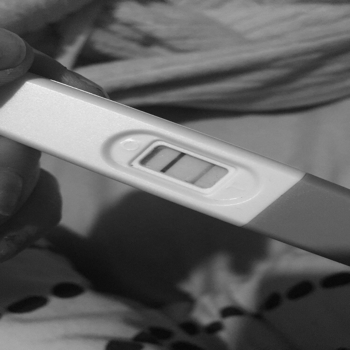

In [112]:
PIL.Image.open(str(PositiveTest[0]))

In [113]:
# Preprocessing
lenPositive = len(PositiveTest)
counter = 0
for imgs in PositiveTest:
  PositiveTest[counter] = load_image_350(PositiveTest[counter])
  counter += 1

In [114]:
# Preprocessing
lenNegative = len(NegativeTest)
counter = 0
for imgs in NegativeTest:
  NegativeTest[counter] = load_image_350(NegativeTest[counter])
  counter += 1

In [116]:
## Evaluating
posTestResults = []
negTestResults = []
class_names = ['Negative', 'Positive']
for PosImgs in PositiveTest:
  pred = ClearPreg_40_350.predict(PosImgs)
  predicted_class_index = np.argmax(pred, axis=1)
  predicted_class = class_names[predicted_class_index[0]]
  posTestResults.append(predicted_class)

for NegImgs in NegativeTest:
  pred = ClearPreg_40_350.predict(NegImgs)
  print(pred)
  predicted_class_index = np.argmax(pred, axis=1)
  predicted_class = class_names[predicted_class_index[0]]
  negTestResults.append(predicted_class)

1/1 [==============================] - 1s 693ms/step
[[0.00484213 0.9951579 ]]
1/1 [==============================] - 1s 685ms/step
[[4.7297748e-05 9.9995267e-01]]
1/1 [==============================] - 1s 696ms/step
[[9.9999988e-01 1.2374147e-07]]
1/1 [==============================] - 0s 392ms/step
[[5.5299442e-05 9.9994469e-01]]
1/1 [==============================] - 0s 380ms/step
[[0.9986609  0.00133911]]


In [117]:
posTestResults

['Positive', 'Positive', 'Positive', 'Positive', 'Positive']

In [118]:
negTestResults

['Positive', 'Positive', 'Negative', 'Positive', 'Negative']